https://huggingface.co/dslim/bert-base-NER#:~:text=bert%2Dbase%2DNER%20is%20a,)%20and%20Miscellaneous%20(MISC).

In [1]:
! pip install transformers==4.27.4
! pip install tokenizers==0.13.3
! pip install huggingface-hub==0.13.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 43.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 74.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 kB 6.0 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.15.1
    Uninstalling huggingface-hub-0.15.1:
      Successfully uninstalled huggingface-hub-0.15.1


In [2]:
! pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 33.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 19.3 MB/s eta 0:00:00


In [3]:
! pip install seqeval

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16165 sha256=646a4770fdce7d8efe5be9950ac3bb5b851f16bc1dbe01c5206585f39c3c438d
  Stored in directory: /root/.cache/pip/wheels/1a/67/4a/ad4082dd7dfc30f2abfe4d80a2ed5926a506eb8a972b4767fa
Successfully built seqeval


In [4]:
# Connect to Google Drive for later use
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Preprocessing

In [5]:
import pandas as pd
import string
import re
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
import numpy as np
#import nltk
#from nltk.corpus import stopwords
#nltk.download ('stopwords')
#import tensorflow as tf
#import nltk
import datasets
from datasets import DatasetDict, Dataset
#nltk.download('punkt')

In [6]:
import json
f = open('/content/drive/Shareddrives/CRP_SG/Model_selection/master_dict_output_BERT_patterned_v2.json')
data = json.load(f)

In [7]:
print(data.keys())
print(data['annotations'][4])
print(data['classes'])

dict_keys(['classes', 'annotations', 'pattern_num'])
['"}/(.\'&%; M1H3JFGTD76302Z73WAGM ro Monteiro *$]€/ ?>!#_|^-< @~+=[)`:{£, Sr. ` Ped RN 42 de Saudade / Vila Brazil Fernandes Martins 88218-203', {'id': [4], 'tokens': ['"}/(.\'&%;', 'M1H3JFGTD76302Z73WAGM', 'ro', 'Monteiro', '*$]€/', '?>!#_|^-<', '@~+=[)`:{£,', 'Sr.', '`', 'Ped', 'RN', '42', 'de', 'Saudade', '/', 'Vila', 'Brazil', 'Fernandes', 'Martins', '88218-203'], 'ner_tags': [7, 5, 1, 2, 7, 8, 8, 1, 2, 2, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4]}]
{'O': 0, 'B-NAME': 1, 'I-NAME': 2, 'B-LOC': 3, 'I-LOC': 4, 'B-ACC': 5, 'I-ACC': 6, 'B-MISC': 7, 'I-MISC': 8}


    "0": "O",
    "1": "B-NAME",
    "2": "I-NAME",
    "3": "B-LOC",
    "4": "I-LOC",
    "5": "B-ACC",
    "6": "I-ACC"
    "7": "B-MISC",
    "8": "I-MISC"

In [ ]:
# For create the vocabulary use
documents = [x[0] for x in data['annotations']]
documents_extr = documents #[:100]
print(np.array(documents).shape)

(101045,)


In [8]:
# Randomly sample part of the data
def select_random_part(data, n_max): 
  new_dict = {}
  annotations = np.array(data['annotations'])
  np.random.shuffle(annotations)
  annotations = annotations[:n_max]
  new_dict['annotations'] = annotations
  new_dict['classes'] = data['classes']
  return new_dict

data_e = select_random_part(data, 10000)

In [9]:
data_dic = [x[1] for x in data_e['annotations']]

In [10]:
# Split the data into training and test sets
train_data, test_data = train_test_split(data_dic, test_size=0.2, random_state=42)

# Split the training data into training and validation sets
train_data, val_data = train_test_split(data_dic, test_size=0.2, random_state=42)

In [ ]:
train_data[0]

{'id': [73620],
 'tokens': ['$&*',
  'Emmanuel',
  'Menard',
  '9',
  'boulevard',
  'de',
  'Lambert',
  '88854',
  'Vaillant-la-Foret',
  'France'],
 'ner_tags': [7, 1, 2, 3, 4, 4, 4, 4, 4, 4]}

In [11]:
# Convert the train, val, and test data to Dataset objects
train_dataset = Dataset.from_dict({"id": [d['id'] for d in train_data], "tokens": [d["tokens"] for d in train_data], "ner_tags": [d["ner_tags"] for d in train_data]})
val_dataset = Dataset.from_dict({"id": [d['id'] for d in val_data], "tokens": [d["tokens"] for d in val_data], "ner_tags": [d["ner_tags"] for d in val_data]})
test_dataset = Dataset.from_dict({"id": [d['id'] for d in test_data], "tokens": [d["tokens"] for d in test_data], "ner_tags": [d["ner_tags"] for d in test_data]})

# Create the DatasetDict object
dataset_sg = DatasetDict({'train': train_dataset, 'validation': val_dataset, 'test': test_dataset})


In [ ]:
print(dataset_sg)

DatasetDict({
    train: Dataset({
        features: ['id', 'tokens', 'ner_tags'],
        num_rows: 24000
    })
    validation: Dataset({
        features: ['id', 'tokens', 'ner_tags'],
        num_rows: 6000
    })
})


In [65]:
def tokenize_and_align_labels(examples, label_all_tokens=True): 
    tokenized_inputs = tokenizer(examples["tokens"], truncation=True, is_split_into_words=True) 
    labels = [] 
    word_ids_list = []
    for i, label in enumerate(examples["ner_tags"]): 
        word_ids = tokenized_inputs.word_ids(batch_index=i) 
        word_ids_list.append(word_ids)
        # word_ids() => Return a list mapping the tokens
        # to their actual word in the initial sentence.
        # It Returns a list indicating the word corresponding to each token. 
        previous_word_idx = None 
        label_ids = []
        # Special tokens like `<s>` and `<\s>` are originally mapped to None 
        # We need to set the label to -100 so they are automatically ignored in the loss function.
        for word_idx in word_ids: 
            if word_idx is None: 
                # set –100 as the label for these special tokens
                label_ids.append(-100)
            # For the other tokens in a word, we set the label to either the current label or -100, depending on
            # the label_all_tokens flag.
            elif word_idx != previous_word_idx:
                # if current word_idx is != prev then its the most regular case
                # and add the corresponding token                 
                label_ids.append(label[word_idx]) 
            else: 
                # to take care of sub-words which have the same word_idx
                # set -100 as well for them, but only if label_all_tokens == False
                label_ids.append(label[word_idx] if label_all_tokens else -100) 
                # mask the subword representations after the first subword
                 
            previous_word_idx = word_idx 
        labels.append(label_ids) 
    tokenized_inputs["labels"] = labels 
    tokenized_inputs["word_ids"] = word_ids_list
    return tokenized_inputs 

In [13]:
# Specify the usage of GPU
import torch
device = "cuda:0" if torch.cuda.is_available() else "cpu"

In [ ]:
device

'cpu'

# BERT

## Toy trial for BERT

In [ ]:
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline

tokenizer = AutoTokenizer.from_pretrained("dslim/bert-base-NER")
model = AutoModelForTokenClassification.from_pretrained("dslim/bert-base-NER")

nlp = pipeline("ner", model=model, tokenizer=tokenizer)
example = "ES98 7939 2221 2046 6097 7465 Rocha Alegria and Fuentes Canada Noelia Carmona 593 Piso 0  Girona 13801 Spain"

ner_results = nlp(example)
print(ner_results)
# Obviously not working well

[{'entity': 'B-ORG', 'score': 0.99701595, 'index': 1, 'word': 'E', 'start': 0, 'end': 1}, {'entity': 'I-ORG', 'score': 0.8616526, 'index': 2, 'word': '##S', 'start': 1, 'end': 2}, {'entity': 'B-ORG', 'score': 0.9986596, 'index': 16, 'word': 'R', 'start': 30, 'end': 31}, {'entity': 'B-ORG', 'score': 0.99623126, 'index': 17, 'word': '##och', 'start': 31, 'end': 34}, {'entity': 'I-ORG', 'score': 0.9807834, 'index': 18, 'word': '##a', 'start': 34, 'end': 35}, {'entity': 'I-ORG', 'score': 0.99897397, 'index': 19, 'word': 'Al', 'start': 36, 'end': 38}, {'entity': 'I-ORG', 'score': 0.9985044, 'index': 20, 'word': '##eg', 'start': 38, 'end': 40}, {'entity': 'I-ORG', 'score': 0.9984598, 'index': 21, 'word': '##ria', 'start': 40, 'end': 43}, {'entity': 'B-ORG', 'score': 0.92723, 'index': 23, 'word': 'Fu', 'start': 48, 'end': 50}, {'entity': 'I-ORG', 'score': 0.99442613, 'index': 24, 'word': '##ente', 'start': 50, 'end': 54}, {'entity': 'I-ORG', 'score': 0.95928764, 'index': 25, 'word': '##s', 's

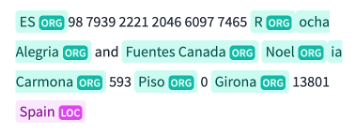

## Add custmized vocabulary

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [ ]:
# Install last Hugging Face libraries (datasets & transformers)
!pip install datasets git+https://github.com/huggingface/transformers/
# install spaCY
!pip install -U pip setuptools wheel
!pip install -U spacy[cuda110]
!python -m spacy download en_core_web_sm
# install scikit-learn
!pip install -U scikit-learn
# install matplotlib
!pip install matplotlib
# install wikipedia
!pip install wikipedia

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/huggingface/transformers/ to /tmp/pip-req-build-jn62yknu
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers/ /tmp/pip-req-build-jn62yknu
  Resolved https://github.com/huggingface/transformers/ to commit 4e1522d65ac5ff5a4a90dc2a223fc20078a85744
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 40.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

### Test adding random words

In [ ]:
from transformers import AutoModelForMaskedLM, AutoTokenizer
model_name = "bert-base-cased"

tokenizer = AutoTokenizer.from_pretrained(model_name, use_fast=True)
model = AutoModelForMaskedLM.from_pretrained(model_name)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
text = "COVID-19 affects different people in different ways. Most infected people will develop mild to moderate illness and recover without hospitalization."


In [ ]:
# tokenization of the text
tokens = tokenizer.tokenize(text)
print(tokens)

['CO', '##VI', '##D', '-', '19', 'affects', 'different', 'people', 'in', 'different', 'ways', '.', 'Most', 'infected', 'people', 'will', 'develop', 'mild', 'to', 'moderate', 'illness', 'and', 'recover', 'without', 'hospital', '##ization', '.']


In [ ]:
# back to text
tokenizer.decode(tokenizer.encode(text), skip_special_tokens=True)

'COVID - 19 affects different people in different ways. Most infected people will develop mild to moderate illness and recover without hospitalization.'

In [ ]:
print(tokenizer.tokenize('COVID'))
print(tokenizer.tokenize('hospitalization'))   

['CO', '##VI', '##D']
['hospital', '##ization']


In [ ]:
# Verify that the words COVID and hospitalization DO NOT belong to the tokenizer vocabulary
vocab = [tok for tok,index in tokenizer.get_vocab().items()]
"COVID" in vocab, "hospitalization" in vocab

(False, False)

In [ ]:
new_tokens = ['COVID', 'hospitalization']
     

In [ ]:
print("[ BEFORE ] tokenizer vocab size:", len(tokenizer)) 
added_tokens = tokenizer.add_tokens(new_tokens)

print("[ AFTER ] tokenizer vocab size:", len(tokenizer)) 
print()
print('added_tokens:',added_tokens)
print()

# resize the embeddings matrix of the model 
model.resize_token_embeddings(len(tokenizer)) 

[ BEFORE ] tokenizer vocab size: 28996
[ AFTER ] tokenizer vocab size: 28998

added_tokens: 2



Embedding(28998, 768)

In [ ]:

# Verify that the words COVID and hospitalization DO belong to the tokenizer vocabulary
vocab = [tok for tok,index in tokenizer.get_vocab().items()]
"COVID" in vocab, "hospitalization" in vocab

(True, True)

In [ ]:

tokenizer_exBERT = tokenizer
     

In [ ]:

# tokenization of the text
tokens = tokenizer_exBERT.tokenize(text)
print(tokens)

['COVID', '-', '19', 'affects', 'different', 'people', 'in', 'different', 'ways', '.', 'Most', 'infected', 'people', 'will', 'develop', 'mild', 'to', 'moderate', 'illness', 'and', 'recover', 'without', 'hospitalization', '.']


In [ ]:
# back to text
tokenizer_exBERT.decode(tokenizer_exBERT.encode(text), skip_special_tokens=True)

'COVID - 19 affects different people in different ways. Most infected people will develop mild to moderate illness and recover without hospitalization.'

In [ ]:
# tokenization of the words COVID and hospitalization
print(tokenizer_exBERT.tokenize('COVID'))
print(tokenizer_exBERT.tokenize('hospitalization'))

['COVID']
['hospitalization']


### Adding complete frequent words to bert

https://medium.com/@pierre_guillou/nlp-how-to-add-a-domain-specific-vocabulary-new-tokens-to-a-subword-tokenizer-already-trained-33ab15613a41

In [ ]:
import spacy
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer

import matplotlib.pyplot as plt

In [ ]:
from transformers import AutoModelForMaskedLM, AutoTokenizer
model_name = "bert-base-uncased"

tokenizer = AutoTokenizer.from_pretrained(model_name, use_fast=True)

In [ ]:
# Use a word tokenizer (spaCY) to find the most frequent words of our corpus by using scikit-learn
# initialize our tokenizer with the English spaCY one
nlp = spacy.load("en_core_web_sm", exclude=['morphologizer', 'parser', 'ner', 'attribute_ruler', 'lemmatizer'])
def spacy_tokenizer(document, nlp=nlp):
    # tokenize the document with spaCY
    doc = nlp(document)
    # Remove stop words and punctuation symbols
    tokens = [
        token.text for token in doc if (
        token.is_stop == False and \
        token.is_punct == False and \
        token.text.strip() != '' and \
        token.text.find("\n") == -1)]
    return tokens

def dfreq(idf, N):
    return (1+N) / np.exp(idf - 1) - 1

In [ ]:
sklearn.__version__

'1.2.2'

In [ ]:
%%time
from tqdm import tqdm
# https://scikit-learn.org/stable/modules/feature_extraction.html#tfidf-term-weighting
tfidf_vectorizer = TfidfVectorizer(lowercase=False, tokenizer=spacy_tokenizer, 
                                   norm='l2', use_idf=True, smooth_idf=True, sublinear_tf=False)
# parse matrix of tfidf
docs = documents_extr
length = len(docs)
#result = tfidf_vectorizer.fit_transform(docs)
result = tfidf_vectorizer.fit_transform(tqdm(docs, desc="Vectorizing documents", total=length))
print(result.shape)

# idf
idf = tfidf_vectorizer.idf_

# sorted idf, tokens and docs frequencies
idf_sorted_indexes = sorted(range(len(idf)), key=lambda k: idf[k])
idf_sorted = idf[idf_sorted_indexes]
tokens_by_df = np.array(tfidf_vectorizer.get_feature_names_out())[idf_sorted_indexes]
dfreqs_sorted = dfreq(idf_sorted, length).astype(np.int32)
tokens_dfreqs = {tok:dfreq for tok, dfreq in zip(tokens_by_df,dfreqs_sorted)}
tokens_pct_list = [int(round(dfreq/length*100,4)) for token,dfreq in tokens_dfreqs.items()]

Vectorizing documents:   0%|          | 0/101045 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
Vectorizing documents: 100%|██████████| 101045/101045 [05:38<00:00, 298.85it/s]


(101045, 229603)
CPU times: user 5min 25s, sys: 2.51 s, total: 5min 27s
Wall time: 5min 41s


As a starting point, you can consider the following general guidelines:

High Threshold (e.g., 0.9 to 1.0): Use a higher threshold if you want to capture only the most significant and informative tokens. This approach can be useful for identifying unique terms that are strongly associated with specific documents or categories.

Moderate Threshold (e.g., 0.3 to 0.9): A moderate threshold strikes a balance between token granularity and efficiency. It allows for a wider range of tokens, including those that occur in a moderate number of documents, potentially capturing more specific information while avoiding excessive noise.

Low Threshold (e.g., 0.0 to 0.3): A lower threshold captures a larger number of tokens, including those that occur in a higher proportion of documents. This approach can be useful if you want to include more general and frequent terms in your analysis.

tokens_pct_list represents a list of document frequencies expressed as percentages for each token. The document frequency percentage is calculated by dividing the raw document frequency of a token by the total number of documents and multiplying it by 100.

In [ ]:
np.mean(tokens_pct_list)

0.0011323893851561172

<ipython-input-46-070d5afd032b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(np.array(tokens_pct_list)+1))


(0.0, 0.002)

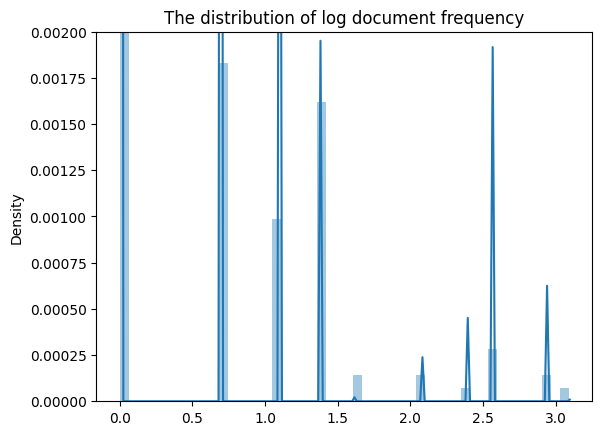

In [ ]:
import seaborn as sns
sns.distplot(np.log(np.array(tokens_pct_list)+1))
plt.title("The distribution of log document frequency")
plt.ylim(0,0.002)

In [ ]:
bert = AutoTokenizer.from_pretrained('bert-base-uncased', use_fast=True)
print(len(bert))

30522


In [ ]:
# Get the vocabulary that is not in the original BERT tokenizer
# list of new tokens
pct = 0
index_max = len(np.array(tokens_pct_list)[np.array(tokens_pct_list)>pct])
new_tokens = tokens_by_df[:index_max]
# print(len(new_tokens))

old_vocab = [k for k,v in tokenizer.get_vocab().items()]
new_vocab = [token for token in new_tokens]
idx_old_vocab_list = list()
same_tokens_list = list()
different_tokens_list = list()

for idx_new,w in tqdm(enumerate(new_vocab)): 
  try:
    idx_old = old_vocab.index(w)
  except:
    idx_old = -1
  if idx_old>=0:
      idx_old_vocab_list.append(idx_old)
      same_tokens_list.append((w,idx_new))
  else:
      different_tokens_list.append((w,idx_new))

75it [00:00, 2825.46it/s]


In [ ]:
len(same_tokens_list),len(different_tokens_list),len(same_tokens_list)+len(different_tokens_list)

(27, 48, 75)

In [ ]:
# get list of new tokens
new_tokens = [k for k,v in different_tokens_list]
print(len(new_tokens), new_tokens[:20])

48 ['Apt', 'Suite', 'Turkey', 'Romania', 'Germany', 'Spain', 'Italy', 'Slovenia', 'Sweden', 'Estonia', 'France', 'Lithuania', 'Latvia', 'Denmark', 'Croatia', 'Norway', 'Czech', 'Poland', 'Portugal', 'Hungary']


In [ ]:
print("[ BEFORE ] tokenizer vocab size:", len(tokenizer)) 
added_tokens = tokenizer.add_tokens(new_tokens)

print("[ AFTER ] tokenizer vocab size:", len(tokenizer)) 
print()
print('added_tokens:',added_tokens)
print()

[ BEFORE ] tokenizer vocab size: 30522
[ AFTER ] tokenizer vocab size: 30570

added_tokens: 48



In [ ]:
# Save the modified tokenizer
tokenizer.save_pretrained("/content/drive/Shareddrives/CRP_SG/Model_selection/tokenizerplus0")

('/content/drive/Shareddrives/CRP_SG/Model_selection/tokenizerplus0/tokenizer_config.json',
 '/content/drive/Shareddrives/CRP_SG/Model_selection/tokenizerplus0/special_tokens_map.json',
 '/content/drive/Shareddrives/CRP_SG/Model_selection/tokenizerplus0/vocab.txt',
 '/content/drive/Shareddrives/CRP_SG/Model_selection/tokenizerplus0/added_tokens.json',
 '/content/drive/Shareddrives/CRP_SG/Model_selection/tokenizerplus0/tokenizer.json')

The following is to test if the new tokens work

In [ ]:
tokenizer_exBERT = tokenizer

In [ ]:
# tokenization of the text
tokens = tokenizer_exBERT.tokenize(text)
print(tokens)

In [ ]:
# back to text
tokenizer_exBERT.decode(tokenizer_exBERT.encode(text), skip_special_tokens=True)

In [ ]:
# tokenization of the words COVID and hospitalization
print(tokenizer_exBERT.tokenize('COVID'))
print(tokenizer_exBERT.tokenize('hospitalization'))

## Fine tuning for SG data

In [14]:
import numpy as np 
from transformers import BertTokenizerFast 
from transformers import DataCollatorForTokenClassification 
from transformers import AutoModelForTokenClassification 

### Tokenization

In [36]:
#tokenizer = BertTokenizerFast.from_pretrained("bert-base-uncased", device=device)
# bert+new tokens
tokenizer = BertTokenizerFast.from_pretrained("/content/drive/Shareddrives/CRP_SG/Model_selection/tokenizerplus0", device=device)

In [70]:
example_text = dataset_sg['train'][4]

tokenized_input = tokenizer(example_text["tokens"], is_split_into_words=True)

tokens = tokenizer.convert_ids_to_tokens(tokenized_input["input_ids"])

word_ids = tokenized_input.word_ids()

print(word_ids)
tokenized_input

[None, 0, 0, 0, 0, 1, 1, 2, 2, 3, 3, 3, 4, 5, 5, 5, 6, 7, 8, 8, 8, 8, 8, 8, 8, 9, 9, 10, 11, 11, 12, 13, 13, 14, 14, 14, 14, 15, 16, 16, 16, 17, None]


{'input_ids': [101, 1040, 2243, 2692, 2629, 27743, 2581, 6353, 21486, 6021, 2692, 2683, 5401, 19438, 2050, 30550, 6615, 1000, 1003, 1006, 1012, 999, 1030, 1031, 1026, 6282, 2509, 13223, 3145, 30550, 30523, 3963, 2581, 26892, 30550, 25866, 10235, 4718, 5840, 22932, 2683, 30535, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [69]:
q = tokenize_and_align_labels(dataset_sg['train'][4:5]) 
print(q) 

{'input_ids': [[101, 1040, 2243, 2692, 2629, 27743, 2581, 6353, 21486, 6021, 2692, 2683, 5401, 19438, 2050, 30550, 6615, 1000, 1003, 1006, 1012, 999, 1030, 1031, 1026, 6282, 2509, 13223, 3145, 30550, 30523, 3963, 2581, 26892, 30550, 25866, 10235, 4718, 5840, 22932, 2683, 30535, 102]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], 'labels': [[-100, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 1, 1, 1, 2, 2, 7, 7, 7, 7, 7, 7, 7, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, -100]], 'word_ids': [[None, 0, 0, 0, 0, 1, 1, 2, 2, 3, 3, 3, 4, 5, 5, 5, 6, 7, 8, 8, 8, 8, 8, 8, 8, 9, 9, 10, 11, 11, 12, 13, 13, 14, 14, 14, 14, 15, 16, 16, 16, 17, None]]}


In [71]:
tokenized_datasets = dataset_sg.map(tokenize_and_align_labels, batched=True)

Map:   0%|          | 0/8000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

### Model training

In [33]:
model = AutoModelForTokenClassification.from_pretrained("bert-base-uncased", num_labels=9).to(device)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForTokenClassification: ['cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-u

In [35]:
# resize the embeddings matrix of the model 
model.resize_token_embeddings(len(tokenizer)) 

Embedding(30570, 768)

In [34]:
data_collator = DataCollatorForTokenClassification(tokenizer) 

In [20]:
metric = datasets.load_metric("seqeval")

<ipython-input-20-b144b02b338d>:1: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = datasets.load_metric("seqeval")


In [21]:
# Need to define the label list
example = dataset_sg['train'][0]
label_list = ['O', 'B-NAME', 'I-NAME', 'B-LOC', 'I-LOC', 'B-ACC', 'I-ACC', 'B-MISC', 'I-MISC']

In [38]:
labels = [label_list[i] for i in example["ner_tags"]] 
print(labels)
metric.compute(predictions=[labels], references=[labels]) 

['B-ACC', 'I-ACC', 'I-ACC', 'I-ACC', 'I-ACC', 'I-ACC', 'I-ACC', 'I-ACC', 'B-NAME', 'I-NAME', 'I-NAME', 'B-LOC', 'B-MISC', 'I-MISC', 'B-LOC', 'I-LOC', 'I-LOC', 'I-LOC', 'I-LOC', 'I-LOC', 'I-LOC', 'I-LOC', 'I-LOC', 'I-LOC', 'I-LOC', 'I-LOC', 'B-NAME']


{'ACC': {'precision': 1.0, 'recall': 1.0, 'f1': 1.0, 'number': 1},
 'LOC': {'precision': 1.0, 'recall': 1.0, 'f1': 1.0, 'number': 2},
 'MISC': {'precision': 1.0, 'recall': 1.0, 'f1': 1.0, 'number': 1},
 'NAME': {'precision': 1.0, 'recall': 1.0, 'f1': 1.0, 'number': 2},
 'overall_precision': 1.0,
 'overall_recall': 1.0,
 'overall_f1': 1.0,
 'overall_accuracy': 1.0}

In [22]:
# Define the function to calculate metrics
def compute_metrics(eval_preds): 
    pred_logits, labels = eval_preds 
    
    pred_logits = np.argmax(pred_logits, axis=2) 
    # the logits and the probabilities are in the same order,
    # so we don’t need to apply the softmax
    
    # We remove all the values where the label is -100
    predictions = [ 
        [label_list[eval_preds] for (eval_preds, l) in zip(prediction, label) if l != -100] 
        for prediction, label in zip(pred_logits, labels) 
    ] 
    
    true_labels = [ 
      [label_list[l] for (eval_preds, l) in zip(prediction, label) if l != -100] 
       for prediction, label in zip(pred_logits, labels) 
   ] 
    results = metric.compute(predictions=predictions, references=true_labels) 

    return {
        "precision": results["overall_precision"],
        "recall": results["overall_recall"],
        "f1": results["overall_f1"],
        "accuracy": results["overall_accuracy"],
        "all": results
  } 


In [39]:
from transformers import TrainingArguments, Trainer 
args = TrainingArguments( 
"test-ner",
evaluation_strategy = "epoch", 
learning_rate=2e-5, 
per_device_train_batch_size=16, 
per_device_eval_batch_size=16, 
num_train_epochs=3, 
weight_decay=0.01
) 

In [40]:
trainer = Trainer( 
    model, 
    args, 
   train_dataset=tokenized_datasets["train"], 
   eval_dataset=tokenized_datasets["validation"], 
   data_collator=data_collator, 
   tokenizer=tokenizer, 
   compute_metrics=compute_metrics
) 

In [ ]:
print(len(tokenizer))

30570


In [ ]:
# dataset 100000
trainer.train() 

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy,All
1,0.146100,0.136108,0.901771,0.912015,0.906864,0.939221,"{'ACC': {'precision': 0.9997825108744562, 'recall': 0.9997750129367562, 'f1': 0.9997787618915482, 'number': 133341}, 'LOC': {'precision': 0.9738692630965755, 'recall': 0.973565441650548, 'f1': 0.9737173286738015, 'number': 48081}, 'MISC': {'precision': 0.7638133771652548, 'recall': 0.7884182807833744, 'f1': 0.775920819009482, 'number': 130257}, 'NAME': {'precision': 0.9348404255319149, 'recall': 0.9356391718698652, 'f1': 0.9352396281575404, 'number': 60860}, 'overall_precision': 0.901770571514262, 'overall_recall': 0.9120145810237318, 'overall_f1': 0.9068636478893917, 'overall_accuracy': 0.9392208762655241}"


Trainer is attempting to log a value of "{'ACC': {'precision': 0.9997825108744562, 'recall': 0.9997750129367562, 'f1': 0.9997787618915482, 'number': 133341}, 'LOC': {'precision': 0.9738692630965755, 'recall': 0.973565441650548, 'f1': 0.9737173286738015, 'number': 48081}, 'MISC': {'precision': 0.7638133771652548, 'recall': 0.7884182807833744, 'f1': 0.775920819009482, 'number': 130257}, 'NAME': {'precision': 0.9348404255319149, 'recall': 0.9356391718698652, 'f1': 0.9352396281575404, 'number': 60860}, 'overall_precision': 0.901770571514262, 'overall_recall': 0.9120145810237318, 'overall_f1': 0.9068636478893917, 'overall_accuracy': 0.9392208762655241}" of type <class 'dict'> for key "eval/all" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy,All
1,0.146100,0.136108,0.901771,0.912015,0.906864,0.939221,"{'ACC': {'precision': 0.9997825108744562, 'recall': 0.9997750129367562, 'f1': 0.9997787618915482, 'number': 133341}, 'LOC': {'precision': 0.9738692630965755, 'recall': 0.973565441650548, 'f1': 0.9737173286738015, 'number': 48081}, 'MISC': {'precision': 0.7638133771652548, 'recall': 0.7884182807833744, 'f1': 0.775920819009482, 'number': 130257}, 'NAME': {'precision': 0.9348404255319149, 'recall': 0.9356391718698652, 'f1': 0.9352396281575404, 'number': 60860}, 'overall_precision': 0.901770571514262, 'overall_recall': 0.9120145810237318, 'overall_f1': 0.9068636478893917, 'overall_accuracy': 0.9392208762655241}"
2,0.130400,0.130346,0.901481,0.920878,0.911076,0.941380,"{'ACC': {'precision': 0.9994003537912631, 'recall': 0.9999325038810268, 'f1': 0.9996663580165921, 'number': 133341}, 'LOC': {'precision': 0.9809956063997347, 'recall': 0.9844845157130675, 'f1': 0.9827369644877664, 'number': 48081}, 'MISC': {'precision': 0.759911346480192, 'recall': 0.7975694204534113, 'f1': 0.7782851192460548, 'number': 130257}, 'NAME': {'precision': 0.9409446919377925, 'recall': 0.9613374958922116, 'f1': 0.9510317866692675, 'number': 60860}, 'overall_precision': 0.90148073208866, 'overall_recall': 0.9208780825631678, 'overall_f1': 0.9110761737578577, 'overall_accuracy': 0.9413801218396772}"
3,0.123100,0.128378,0.910441,0.913496,0.911966,0.942199,"{'ACC': {'precision': 0.9998350193852222, 'recall': 0.9998950060371529, 'f1': 0.9998650118114665, 'number': 133341}, 'LOC': {'precision': 0.984048062979076, 'recall': 0.9879162247041451, 'f1': 0.9859783499911781, 'number': 48081}, 'MISC': {'precision': 0.7726920925385258, 'recall': 0.7741157864836439, 'f1': 0.7734032843216212, 'number': 130257}, 'NAME': {'precision': 0.9510158416162664, 'recall': 0.9637200131449227, 'f1': 0.9573257816261741, 'number': 60860}, 'overall_precision': 0.9104414522631752, 'overall_recall': 0.9134963050848367, 'overall_f1': 0.9119663204381988, 'overall_accuracy': 0.9421989368748196}"


Trainer is attempting to log a value of "{'ACC': {'precision': 0.9994003537912631, 'recall': 0.9999325038810268, 'f1': 0.9996663580165921, 'number': 133341}, 'LOC': {'precision': 0.9809956063997347, 'recall': 0.9844845157130675, 'f1': 0.9827369644877664, 'number': 48081}, 'MISC': {'precision': 0.759911346480192, 'recall': 0.7975694204534113, 'f1': 0.7782851192460548, 'number': 130257}, 'NAME': {'precision': 0.9409446919377925, 'recall': 0.9613374958922116, 'f1': 0.9510317866692675, 'number': 60860}, 'overall_precision': 0.90148073208866, 'overall_recall': 0.9208780825631678, 'overall_f1': 0.9110761737578577, 'overall_accuracy': 0.9413801218396772}" of type <class 'dict'> for key "eval/all" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'ACC': {'precision': 0.9998350193852222, 'recall': 0.9998950060371529, 'f1': 0.9998650118114665, 'number': 133341}, 'LOC': {'precision': 0.98404806297

TrainOutput(global_step=15000, training_loss=0.14512751337687174, metrics={'train_runtime': 4004.1951, 'train_samples_per_second': 59.937, 'train_steps_per_second': 3.746, 'total_flos': 8844189242346720.0, 'train_loss': 0.14512751337687174, 'epoch': 3.0})

In [41]:
# dataset 10000
trainer.train() 

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy,All
1,0.374100,0.203552,0.859718,0.861731,0.860723,0.917394,"{'ACC': {'precision': 0.9987791851060583, 'recall': 0.9988553987027852, 'f1': 0.9988172904505741, 'number': 13105}, 'LOC': {'precision': 0.8557328853422932, 'recall': 0.8358974358974359, 'f1': 0.845698868942617, 'number': 4875}, 'MISC': {'precision': 0.7623428900024645, 'recall': 0.751417004048583, 'f1': 0.7568405170656118, 'number': 12350}, 'NAME': {'precision': 0.7623622047244094, 'recall': 0.8100736278447122, 'f1': 0.78549407755963, 'number': 5976}, 'overall_precision': 0.8597180621582259, 'overall_recall': 0.861730843386768, 'overall_f1': 0.8607232760636615, 'overall_accuracy': 0.9173935916414843}"
2,0.193100,0.185710,0.842429,0.912852,0.876228,0.921088,"{'ACC': {'precision': 0.9985512771635532, 'recall': 0.9993132392216711, 'f1': 0.9989321128909231, 'number': 13105}, 'LOC': {'precision': 0.8903607091909517, 'recall': 0.8962051282051282, 'f1': 0.893273359231241, 'number': 4875}, 'MISC': {'precision': 0.7080075492046374, 'recall': 0.8505263157894737, 'f1': 0.7727506804973148, 'number': 12350}, 'NAME': {'precision': 0.7979330556840969, 'recall': 0.8656291834002677, 'f1': 0.8304037242154266, 'number': 5976}, 'overall_precision': 0.8424290180727485, 'overall_recall': 0.9128518702142896, 'overall_f1': 0.876227742012241, 'overall_accuracy': 0.9210883687925908}"
3,0.163700,0.176827,0.866135,0.900154,0.882817,0.927768,"{'ACC': {'precision': 0.9989319499542264, 'recall': 0.9991606257153758, 'f1': 0.9990462747491703, 'number': 13105}, 'LOC': {'precision': 0.8969965732715178, 'recall': 0.9128205128205128, 'f1': 0.9048393655957706, 'number': 4875}, 'MISC': {'precision': 0.7441216115021716, 'recall': 0.8046153846153846, 'f1': 0.7731870525988173, 'number': 12350}, 'NAME': {'precision': 0.8242193691551751, 'recall': 0.8701472556894244, 'f1': 0.8465608465608465, 'number': 5976}, 'overall_precision': 0.8661348457542669, 'overall_recall': 0.9001542444774968, 'overall_f1': 0.8828169318458088, 'overall_accuracy': 0.9277683301320088}"


Trainer is attempting to log a value of "{'ACC': {'precision': 0.9987791851060583, 'recall': 0.9988553987027852, 'f1': 0.9988172904505741, 'number': 13105}, 'LOC': {'precision': 0.8557328853422932, 'recall': 0.8358974358974359, 'f1': 0.845698868942617, 'number': 4875}, 'MISC': {'precision': 0.7623428900024645, 'recall': 0.751417004048583, 'f1': 0.7568405170656118, 'number': 12350}, 'NAME': {'precision': 0.7623622047244094, 'recall': 0.8100736278447122, 'f1': 0.78549407755963, 'number': 5976}, 'overall_precision': 0.8597180621582259, 'overall_recall': 0.861730843386768, 'overall_f1': 0.8607232760636615, 'overall_accuracy': 0.9173935916414843}" of type <class 'dict'> for key "eval/all" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'ACC': {'precision': 0.9985512771635532, 'recall': 0.9993132392216711, 'f1': 0.9989321128909231, 'number': 13105}, 'LOC': {'precision': 0.8903607091909517, 

TrainOutput(global_step=1500, training_loss=0.2436657002766927, metrics={'train_runtime': 381.1597, 'train_samples_per_second': 62.966, 'train_steps_per_second': 3.935, 'total_flos': 886897317500928.0, 'train_loss': 0.2436657002766927, 'epoch': 3.0})

In [ ]:
# dataset 30000
trainer.train() 

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy,All
1,0.153400,0.142417,0.890727,0.918470,0.904385,0.938330,"{'ACC': {'precision': 0.9992715352394828, 'recall': 0.9996876708050285, 'f1': 0.9994795597075125, 'number': 38421}, 'LOC': {'precision': 0.9615279672578445, 'recall': 0.9715349093666, 'f1': 0.9665055366999211, 'number': 14509}, 'MISC': {'precision': 0.7573184731655984, 'recall': 0.8075745983167559, 'f1': 0.7816395546888499, 'number': 39210}, 'NAME': {'precision': 0.910151507153038, 'recall': 0.9435232309965523, 'f1': 0.9265369733447979, 'number': 18273}, 'overall_precision': 0.8907265572848961, 'overall_recall': 0.9184697454104136, 'overall_f1': 0.9043854368715581, 'overall_accuracy': 0.9383297609636433}"
2,0.134400,0.138472,0.896894,0.917120,0.906894,0.939723,"{'ACC': {'precision': 0.9996615640945538, 'recall': 0.9994273964758856, 'f1': 0.9995444665703539, 'number': 38421}, 'LOC': {'precision': 0.967566094303625, 'recall': 0.9787028740781584, 'f1': 0.9731026212095255, 'number': 14509}, 'MISC': {'precision': 0.7601727610220076, 'recall': 0.7990053557765876, 'f1': 0.7791054797756861, 'number': 39210}, 'NAME': {'precision': 0.9318352865283303, 'recall': 0.9486127072730258, 'f1': 0.940149152542373, 'number': 18273}, 'overall_precision': 0.8968937937875876, 'overall_recall': 0.9171202666352694, 'overall_f1': 0.9068942664206774, 'overall_accuracy': 0.9397233926373868}"
3,0.124600,0.137482,0.902438,0.910971,0.906684,0.939817,"{'ACC': {'precision': 0.9995575221238938, 'recall': 0.9995315062075427, 'f1': 0.9995445139964342, 'number': 38421}, 'LOC': {'precision': 0.9704736518351446, 'recall': 0.9786339513405472, 'f1': 0.9745367192862046, 'number': 14509}, 'MISC': {'precision': 0.7688884419078269, 'recall': 0.7799285896454986, 'f1': 0.7743691680488207, 'number': 39210}, 'NAME': {'precision': 0.9338270809853486, 'recall': 0.9522245936627811, 'f1': 0.9429361079499268, 'number': 18273}, 'overall_precision': 0.9024377114043981, 'overall_recall': 0.9109706284586054, 'overall_f1': 0.9066840942894488, 'overall_accuracy': 0.9398171164049193}"


Trainer is attempting to log a value of "{'ACC': {'precision': 0.9992715352394828, 'recall': 0.9996876708050285, 'f1': 0.9994795597075125, 'number': 38421}, 'LOC': {'precision': 0.9615279672578445, 'recall': 0.9715349093666, 'f1': 0.9665055366999211, 'number': 14509}, 'MISC': {'precision': 0.7573184731655984, 'recall': 0.8075745983167559, 'f1': 0.7816395546888499, 'number': 39210}, 'NAME': {'precision': 0.910151507153038, 'recall': 0.9435232309965523, 'f1': 0.9265369733447979, 'number': 18273}, 'overall_precision': 0.8907265572848961, 'overall_recall': 0.9184697454104136, 'overall_f1': 0.9043854368715581, 'overall_accuracy': 0.9383297609636433}" of type <class 'dict'> for key "eval/all" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'ACC': {'precision': 0.9996615640945538, 'recall': 0.9994273964758856, 'f1': 0.9995444665703539, 'number': 38421}, 'LOC': {'precision': 0.967566094303625

TrainOutput(global_step=4500, training_loss=0.13910883670383029, metrics={'train_runtime': 1229.2084, 'train_samples_per_second': 58.574, 'train_steps_per_second': 3.661, 'total_flos': 2655955649061504.0, 'train_loss': 0.13910883670383029, 'epoch': 3.0})

In [ ]:
model.save_pretrained("/content/drive/Shareddrives/CRP_SG/Model_selection/ner_model_bplusn_100000")

In [25]:
model.from_pretrained("/content/drive/Shareddrives/CRP_SG/Model_selection/ner_model_bplusn_10000")

BertForTokenClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30570, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, el

In [ ]:
tokenizer.save_pretrained("/content/drive/Shareddrives/CRP_SG/Model_selection/tokenizer_10000")

('/content/drive/Shareddrives/CRP_SG/Model_selection/tokenizer_100000/tokenizer_config.json',
 '/content/drive/Shareddrives/CRP_SG/Model_selection/tokenizer_100000/special_tokens_map.json',
 '/content/drive/Shareddrives/CRP_SG/Model_selection/tokenizer_100000/vocab.txt',
 '/content/drive/Shareddrives/CRP_SG/Model_selection/tokenizer_100000/added_tokens.json',
 '/content/drive/Shareddrives/CRP_SG/Model_selection/tokenizer_100000/tokenizer.json')

In [26]:
tokenizer = BertTokenizerFast.from_pretrained("/content/drive/Shareddrives/CRP_SG/Model_selection/tokenizer_0601", device=device)

### Evaluation on test dataset

In [27]:
id2label = {
    str(i): label for i,label in enumerate(label_list)
}
label2id = {
    label: str(i) for i,label in enumerate(label_list)
}

In [28]:
def convert_labels(labels):
    while -100 in labels:
        labels.remove(-100)
    return labels

In [29]:
# Define the function to predict the labels
from tqdm import tqdm
def predictions_flattened(model, dataloader):
    total_prediction = []
    total_labels = []
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Set the model to evaluation mode
    model.eval()

    # Iterate over the validation DataLoader
    for batch in tqdm(dataloader, desc="Evaluation"):
        inputs = torch.tensor(batch["input_ids"]).to(device)
        attention_masks = torch.tensor(batch["attention_mask"]).to(device)
        labels = torch.tensor(batch["labels"])

        inputs = inputs.unsqueeze(0)
        attention_masks = attention_masks.unsqueeze(0)

        outputs = model(inputs, attention_masks)
        preds = torch.argmax(outputs.logits, dim=2).tolist()[0][1:-1]
        original_labels = convert_labels(labels.tolist())

        total_prediction += [p for p in preds]
        total_labels += [label for label in original_labels]

    return total_prediction, total_labels

In [42]:
predicted_labels, true_labels = predictions_flattened(model, tokenized_datasets['test'])

Evaluation: 100%|██████████| 2000/2000 [00:30<00:00, 64.89it/s]


In [ ]:
id2label

{'0': 'O',
 '1': 'B-NAME',
 '2': 'I-NAME',
 '3': 'B-LOC',
 '4': 'I-LOC',
 '5': 'B-ACC',
 '6': 'I-ACC',
 '7': 'B-MISC',
 '8': 'I-MISC'}

In [43]:
false_pred = [true_labels[i] if predicted_labels[i] != true_labels[i] else -1 for i in range(len(predicted_labels)) ]
while -1 in false_pred :
  false_pred.remove(-1)

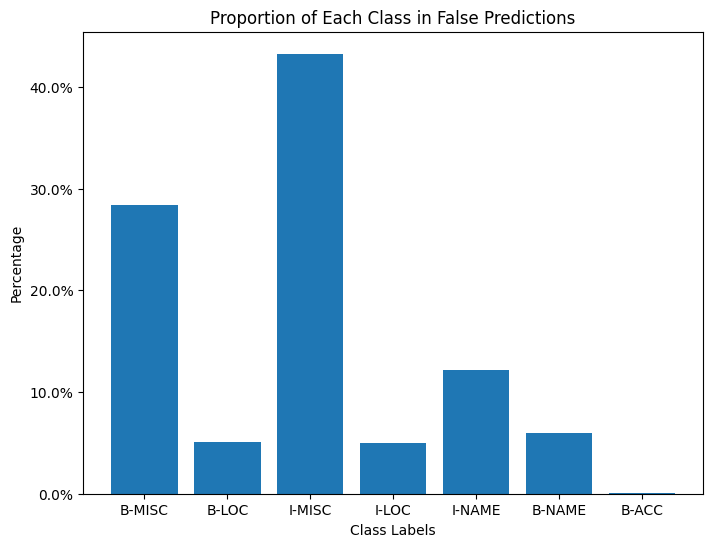

In [44]:
import matplotlib.ticker as mticker

# Count the occurrences of each class in false_pred
class_counts = {}
for label in false_pred:
    if label in class_counts:
        class_counts[label] += 1
    else:
        class_counts[label] = 1

# Calculate the total count
total_count = sum(class_counts.values())

# Calculate the percentage for each class
class_labels = [id2label[str(label)] for label in class_counts.keys()]
class_percentages = [(count / total_count) * 100 for count in class_counts.values()]

# Create a bar plot of class proportions
plt.figure(figsize=(8, 6))
plt.bar(class_labels, class_percentages)
plt.xlabel('Class Labels')
plt.ylabel('Percentage')
plt.title('Proportion of Each Class in False Predictions')

# Add percentage sign to y-axis labels
plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter())

plt.show()

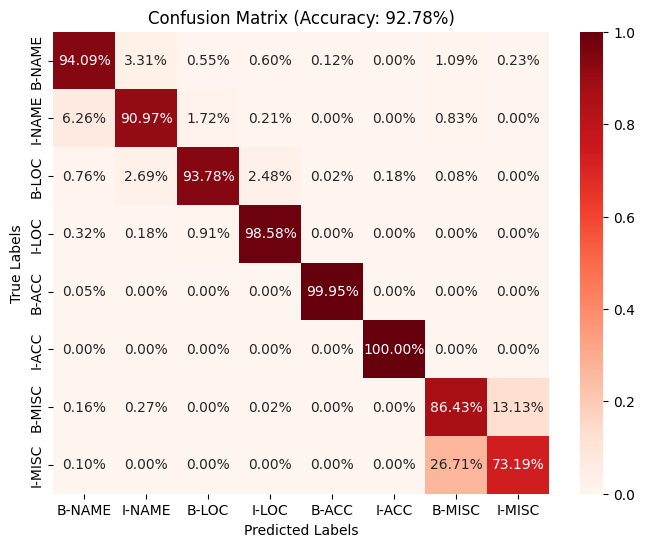

Accuracy: 92.78%
F1 Score: 92.75%
Precision: 92.83%
Recall: 92.78%


In [45]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import seaborn as sns

cm = confusion_matrix(true_labels, predicted_labels)
accuracy = accuracy_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels, average='weighted')
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt=".2%", cmap="Reds")

# Get class labels from indexes using the idx_to_class dictionary
class_labels = [id2label[str(label_idx)] for label_idx in sorted(set(true_labels))]

plt.title("Confusion Matrix (Accuracy: {:.2%})".format(accuracy))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

# Set x-axis and y-axis labels using class labels
plt.xticks(np.arange(len(class_labels)) + 0.5, class_labels)
plt.yticks(np.arange(len(class_labels))+ 0.5, class_labels)

plt.show()

print("Accuracy: {:.2%}".format(accuracy))
print("F1 Score: {:.2%}".format(f1))
print("Precision: {:.2%}".format(precision))
print("Recall: {:.2%}".format(recall))


#### Test the model with raw text(word wise)

In [46]:
def most_frequent(lst):
    """
    Returns the most frequent value in a list.

    Args:
        lst (list): A list of values.

    Returns:
        The most frequent value in the list.
    """
    # Create a dictionary to store the count of each value in the list
    counts = {}
    for item in lst:
        if item in counts:
            counts[item] += 1
        else:
            counts[item] = 1

    # Find the most frequent value in the dictionary
    max_count = 0
    max_item = None
    for item, count in counts.items():
        if count > max_count:
            max_count = count
            max_item = item

    return max_item

In [94]:
from collections import defaultdict

# Randomly sample one text
n = len(data['annotations'])
random_ex = data['annotations'][np.random.randint(n)]
example_sequence = random_ex[0]
true_label = random_ex[1]['ner_tags']

from tqdm import tqdm

def test_word(model, example_sequence):
    print(f'Trying to pass the following sequence : {example_sequence}')
    print('The predicted classes for the sequence by the BERT are :')
    if type(example_sequence) == str : 
      example_sequence = example_sequence.split(" ")
    
    sample_dataset = Dataset.from_dict({"tokens": example_sequence})

    def tokenize(example):
        tokenized_inputs = tokenizer(example_sequence, truncation=True, is_split_into_words=True) 
        word_ids = tokenized_inputs.word_ids(batch_index=0)
        tokenized_inputs['word_ids'] = word_ids
        return tokenized_inputs

    tokenized_inputs = sample_dataset.map(tokenize)

    inputs_ids = torch.tensor(tokenized_inputs["input_ids"]).to(device)
    
    attention_mask = torch.tensor(tokenized_inputs["attention_mask"]).to(device)

    output = model(inputs_ids, attention_mask)
    preds = torch.argmax(output.logits, dim=2).tolist()[0][1:-1]

    word_ids = tokenized_inputs['word_ids'][0]

    word_dict = defaultdict(list)
    index = 0
    for _, id in enumerate(word_ids):
        if id is not None:
            word_dict[id].append(preds[index])
            index+=1

    final_dict = {}
    for key, value in word_dict.items() :
      final_dict[example_sequence[key]] = id2label[str(most_frequent(value))]


    return final_dict

true_label_texts = [id2label[str(i)] for i in true_label]
predicted_labels = test_word(model,example_sequence)
print(predicted_labels)
print("The predicted label is:", predicted_labels.values())
print("The true label is:", true_label_texts)

Trying to pass the following sequence : ES0295253082043177078137 luch Bernal - Amparo Paseo Herminia L *`; lamas 92 Ceuta 43273 Spain L
The predicted classes for the sequence by the BERT are :


Map:   0%|          | 0/15 [00:00<?, ? examples/s]

{'ES0295253082043177078137': 'B-ACC', 'luch': 'B-NAME', 'Bernal': 'I-NAME', '-': 'I-NAME', 'Amparo': 'B-LOC', 'Paseo': 'B-LOC', 'Herminia': 'I-LOC', 'L': 'B-NAME', '*`;': 'B-MISC', 'lamas': 'B-LOC', '92': 'I-LOC', 'Ceuta': 'I-LOC', '43273': 'I-LOC', 'Spain': 'I-LOC'}
The predicted label is: dict_values(['B-ACC', 'B-NAME', 'I-NAME', 'I-NAME', 'B-LOC', 'B-LOC', 'I-LOC', 'B-NAME', 'B-MISC', 'B-LOC', 'I-LOC', 'I-LOC', 'I-LOC', 'I-LOC'])
The true label is: ['B-ACC', 'B-NAME', 'I-NAME', 'I-NAME', 'I-NAME', 'B-LOC', 'I-LOC', 'I-LOC', 'B-MISC', 'B-LOC', 'I-LOC', 'I-LOC', 'I-LOC', 'I-LOC', 'B-NAME']


#### Test the model with raw text(token wise)

In [ ]:
config = json.load(open("/content/drive/Shareddrives/CRP_SG/Model_selection/ner_model/config.json"))
config["id2label"] = id2label
config["label2id"] = label2id

In [ ]:
json.dump(config, open("/content/drive/Shareddrives/CRP_SG/Model_selection/ner_model/config_v2.json","w"))
model_fine_tuned = AutoModelForTokenClassification.from_pretrained("/content/drive/Shareddrives/CRP_SG/Model_selection/ner_model_v2")

In [ ]:
from transformers import pipeline
nlp = pipeline("ner", model=model_fine_tuned, tokenizer=tokenizer)

In [ ]:
example = "ES98 7939 2221 2046 6097 7465 Rocha Alegria and Fuentes Canada Noelia Carmona 593 Piso 0  Girona 13801 Spain"

ner_results = nlp(example)
 
print(ner_results)

In [ ]:
# Make the result easier to view
example_list = []
example_label = []
for i in ner_results:
    example_list.append(i['word'])
    example_label.append(i['entity'])
print(example_list)
print()
print(example_label)

['es', '##9', '##8', '79', '##39', '222', '##1', '204', '##6', '60', '##9', '##7', '74', '##65', 'roc', '##ha', 'ale', '##gr', '##ia', 'and', 'fu', '##entes', 'canada', 'noel', '##ia', 'car', '##mona', '59', '##3', 'pi', '##so', '0', 'giro', '##na', '138', '##01', 'spain']

['LABEL_5', 'LABEL_5', 'LABEL_5', 'LABEL_6', 'LABEL_6', 'LABEL_6', 'LABEL_6', 'LABEL_6', 'LABEL_6', 'LABEL_6', 'LABEL_6', 'LABEL_6', 'LABEL_6', 'LABEL_6', 'LABEL_1', 'LABEL_1', 'LABEL_2', 'LABEL_2', 'LABEL_2', 'LABEL_2', 'LABEL_2', 'LABEL_2', 'LABEL_3', 'LABEL_4', 'LABEL_4', 'LABEL_4', 'LABEL_4', 'LABEL_4', 'LABEL_4', 'LABEL_4', 'LABEL_4', 'LABEL_4', 'LABEL_4', 'LABEL_4', 'LABEL_4', 'LABEL_4', 'LABEL_4']


In [ ]:
# Try the sensitive accounts
example_s = "Xiaoming Li, 4561889125271886 Shinan District, Qingdao, Shandong,China"
ner_results_s = nlp(example_s)
example_list_s = []
example_label_s = []
for i in ner_results_s:
    example_list_s.append(i['word'])
    example_label_s.append(i['entity'])
print(example_list_s)
print()
print(example_label_s)


['xiao', '##ming', 'li', ',', '45', '##6', '##18', '##8', '##9', '##12', '##52', '##7', '##18', '##86', 'shin', '##an', 'district', ',', 'qing', '##da', '##o', ',', 'shandong', ',', 'china']

['LABEL_1', 'LABEL_1', 'LABEL_2', 'LABEL_2', 'LABEL_5', 'LABEL_5', 'LABEL_5', 'LABEL_5', 'LABEL_5', 'LABEL_5', 'LABEL_5', 'LABEL_5', 'LABEL_5', 'LABEL_5', 'LABEL_4', 'LABEL_4', 'LABEL_4', 'LABEL_4', 'LABEL_4', 'LABEL_4', 'LABEL_4', 'LABEL_4', 'LABEL_4', 'LABEL_4', 'LABEL_4']


## Hyperparameter tuning

Dataset size

datasize: 10000

Accuracy: epoch 1 - 92.52; epoch 2 - 93.08; epoch 3 - 93.24

datasize: 20000

Accuracy: epoch 1 - 93.12; epoch 2 - 93.32; epoch 3 - 93.32

datasize: 30000

Accuracy: epoch 1 - 93.83; epoch 2 - 93.97; epoch 3 - 93.98

datasize: 100000(train: 64000, val: 16000, test: 20000)

Accuracy: epoch 1 - 93.92; epoch 2 - 94.14; 

# Appendix

## Sample for BERT fine tuning with sample dataset

https://www.kaggle.com/code/abhishek/entity-extraction-model-using-bert-pytorch/notebook

In [ ]:
# Practice on example dataset
# https://github.com/rohan-paul/MachineLearning-DeepLearning-Code-for-my-YouTube-Channel/blob/master/NLP/YT_Fine_tuning_BERT_NER_v1.ipynb

In [ ]:
import datasets 
import numpy as np 
from transformers import BertTokenizerFast 
from transformers import DataCollatorForTokenClassification 
from transformers import AutoModelForTokenClassification 

conll2003 = datasets.load_dataset("conll2003") 

Generating train split:   0%|          | 0/14041 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3250 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3453 [00:00<?, ? examples/s]

Dataset conll2003 downloaded and prepared to /root/.cache/huggingface/datasets/conll2003/conll2003/1.0.0/9a4d16a94f8674ba3466315300359b0acd891b68b6c8743ddf60b9c702adce98. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
print(conll2003)

DatasetDict({
    train: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
        num_rows: 14041
    })
    validation: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
        num_rows: 3250
    })
    test: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
        num_rows: 3453
    })
})


In [ ]:
tokenizer = BertTokenizerFast.from_pretrained("bert-base-uncased") 

In [ ]:
example_text = conll2003['train'][0]

tokenized_input = tokenizer(example_text["tokens"], is_split_into_words=True)

tokens = tokenizer.convert_ids_to_tokens(tokenized_input["input_ids"])

word_ids = tokenized_input.word_ids()

print(word_ids)

''' As we can see, it returns a list with the same number of elements as our processed input ids, mapping special tokens to None and all other tokens to their respective word. This way, we can align the labels with the processed input ids. '''

tokenized_input

[None, 0, 1, 2, 3, 4, 5, 6, 7, 8, None]


{'input_ids': [101, 7327, 19164, 2446, 2655, 2000, 17757, 2329, 12559, 1012, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [ ]:
print(conll2003['train'])

Dataset({
    features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
    num_rows: 14041
})


In [ ]:
print(example_text)

{'id': '0', 'tokens': ['EU', 'rejects', 'German', 'call', 'to', 'boycott', 'British', 'lamb', '.'], 'pos_tags': [22, 42, 16, 21, 35, 37, 16, 21, 7], 'chunk_tags': [11, 21, 11, 12, 21, 22, 11, 12, 0], 'ner_tags': [3, 0, 7, 0, 0, 0, 7, 0, 0]}


In [ ]:
len(example_text['ner_tags']), len(tokenized_input["input_ids"])
# (9, 11)

(9, 11)

The below function tokenize_and_align_labels does 2 jobs

set –100 as the label for these special tokens and the subwords we wish to mask during training

mask the subword representations after the first subword


In [ ]:
def tokenize_and_align_labels(examples, label_all_tokens=True): 
    tokenized_inputs = tokenizer(examples["tokens"], truncation=True, is_split_into_words=True) 
    labels = [] 
    for i, label in enumerate(examples["ner_tags"]): 
        word_ids = tokenized_inputs.word_ids(batch_index=i) 
        # word_ids() => Return a list mapping the tokens
        # to their actual word in the initial sentence.
        # It Returns a list indicating the word corresponding to each token. 
        previous_word_idx = None 
        label_ids = []
        # Special tokens like `<s>` and `<\s>` are originally mapped to None 
        # We need to set the label to -100 so they are automatically ignored in the loss function.
        for word_idx in word_ids: 
            if word_idx is None: 
                # set –100 as the label for these special tokens
                label_ids.append(-100)
            # For the other tokens in a word, we set the label to either the current label or -100, depending on
            # the label_all_tokens flag.
            elif word_idx != previous_word_idx:
                # if current word_idx is != prev then its the most regular case
                # and add the corresponding token                 
                label_ids.append(label[word_idx]) 
            else: 
                # to take care of sub-words which have the same word_idx
                # set -100 as well for them, but only if label_all_tokens == False
                label_ids.append(label[word_idx] if label_all_tokens else -100) 
                # mask the subword representations after the first subword
                 
            previous_word_idx = word_idx 
        labels.append(label_ids) 
    tokenized_inputs["labels"] = labels 
    return tokenized_inputs 

In [ ]:
q = tokenize_and_align_labels(conll2003['train'][4:5]) 
print(q) 

{'input_ids': [[101, 2762, 1005, 1055, 4387, 2000, 1996, 2647, 2586, 1005, 1055, 15651, 2837, 14121, 1062, 9328, 5804, 2056, 2006, 9317, 10390, 2323, 4965, 8351, 4168, 4017, 2013, 3032, 2060, 2084, 3725, 2127, 1996, 4045, 6040, 2001, 24509, 1012, 102]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], 'labels': [[-100, 5, 0, 0, 0, 0, 0, 3, 4, 0, 0, 0, 0, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, -100]]}


In [ ]:
tokenized_datasets = conll2003.map(tokenize_and_align_labels, batched=True)

Map:   0%|          | 0/14041 [00:00<?, ? examples/s]

Map:   0%|          | 0/3250 [00:00<?, ? examples/s]

Map:   0%|          | 0/3453 [00:00<?, ? examples/s]

In [ ]:
model = AutoModelForTokenClassification.from_pretrained("bert-base-uncased", num_labels=9)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForTokenClassification: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-u

In [ ]:
from transformers import TrainingArguments, Trainer 
args = TrainingArguments( 
"test-ner",
evaluation_strategy = "epoch", 
learning_rate=2e-5, 
per_device_train_batch_size=16, 
per_device_eval_batch_size=16, 
num_train_epochs=3, 
weight_decay=0.01, 
) 

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:546: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
data_collator = DataCollatorForTokenClassification(tokenizer) 

In [ ]:
# seqeval is a Python framework for sequence labeling evaluation. 
# seqeval can evaluate the performance of chunking tasks such as named-entity recognition, 
# part-of-speech tagging, semantic role labeling and so on.
metric = datasets.load_metric("seqeval") 

<ipython-input-26-bf5a7b7515d7>:4: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = datasets.load_metric("seqeval")


In [ ]:
example = conll2003['train'][0]

In [ ]:
label_list = conll2003["train"].features["ner_tags"].feature.names 
label_list

['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC', 'B-MISC', 'I-MISC']

In [ ]:
labels = [label_list[i] for i in example["ner_tags"]] 
print(labels)
metric.compute(predictions=[labels], references=[labels]) 

['B-ORG', 'O', 'B-MISC', 'O', 'O', 'O', 'B-MISC', 'O', 'O']


{'MISC': {'precision': 1.0, 'recall': 1.0, 'f1': 1.0, 'number': 2},
 'ORG': {'precision': 1.0, 'recall': 1.0, 'f1': 1.0, 'number': 1},
 'overall_precision': 1.0,
 'overall_recall': 1.0,
 'overall_f1': 1.0,
 'overall_accuracy': 1.0}

In [ ]:
def compute_metrics(eval_preds): 
    pred_logits, labels = eval_preds 
    
    pred_logits = np.argmax(pred_logits, axis=2) 
    # the logits and the probabilities are in the same order,
    # so we don’t need to apply the softmax
    
    # We remove all the values where the label is -100
    predictions = [ 
        [label_list[eval_preds] for (eval_preds, l) in zip(prediction, label) if l != -100] 
        for prediction, label in zip(pred_logits, labels) 
    ] 
    
    true_labels = [ 
      [label_list[l] for (eval_preds, l) in zip(prediction, label) if l != -100] 
       for prediction, label in zip(pred_logits, labels) 
   ] 
    results = metric.compute(predictions=predictions, references=true_labels) 
    return { 
   "precision": results["overall_precision"], 
   "recall": results["overall_recall"], 
   "f1": results["overall_f1"], 
  "accuracy": results["overall_accuracy"], 
  } 

In [ ]:
trainer = Trainer( 
    model, 
    args, 
   train_dataset=tokenized_datasets["train"], 
   eval_dataset=tokenized_datasets["validation"], 
   data_collator=data_collator, 
   tokenizer=tokenizer, 
   compute_metrics=compute_metrics 
) 

In [ ]:
trainer.train() 

In [ ]:
model.save_pretrained("ner_model")

In [ ]:
tokenizer.save_pretrained("tokenizer")

In [ ]:
id2label = {
    str(i): label for i,label in enumerate(label_list)
}
label2id = {
    label: str(i) for i,label in enumerate(label_list)
}

In [ ]:
config = json.load(open("ner_model/config.json"))

In [ ]:
config["id2label"] = id2label
config["label2id"] = label2id

In [ ]:
json.dump(config, open("ner_model/config.json","w"))
model_fine_tuned = AutoModelForTokenClassification.from_pretrained("ner_model")

## RoBERTa

In [95]:
from transformers import RobertaTokenizerFast, RobertaForTokenClassification, DataCollatorForTokenClassification 
from sklearn.metrics import classification_report
import datasets 
import numpy as np 
import torch
from transformers import pipeline
from transformers.optimization import get_linear_schedule_with_warmup

**Normal Tokenizer**: A normal tokenizer typically follows traditional tokenization techniques, which involve rules-based or regex-based approaches to split text into tokens. These tokenization methods are usually slower as they process text sequentially and may require multiple passes over the text. Normal tokenizers are often rule-based and rely on heuristics, such as whitespace or punctuation, to determine token boundaries. Examples of normal tokenizers include the NLTK tokenizer in Python or the tokenization functions provided by other NLP libraries.

**Fast Tokenizer**: A fast tokenizer, on the other hand, is designed to be more efficient and optimized for speed. It often utilizes pre-processing techniques, such as byte-pair encoding (BPE) or subword tokenization, to split text into tokens. These methods can handle more complex cases, such as out-of-vocabulary words or domain-specific terms, and are typically faster because they do not require multiple passes over the text. Fast tokenizers are often used in large-scale NLP applications where processing speed is critical, such as machine translation or language modeling. Examples of fast tokenizers include the Hugging Face Transformers library's tokenizers or the SentencePiece library.



In [96]:
tokenizer = RobertaTokenizerFast.from_pretrained('roberta-base',device = device, add_prefix_space=True) 

In [97]:
# Test the tokenizer with example text
example_text = dataset_sg['train'][0]

tokenized_input = tokenizer(example_text["tokens"], is_split_into_words=True)

tokens = tokenizer.convert_ids_to_tokens(tokenized_input["input_ids"])

word_ids = tokenized_input.word_ids()

print(word_ids)
tokenized_input

[None, 0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 8, 8, 9, 9, 10, 11, 11, 12, 13, 13, 13, 14, 14, 15, 16, 17, 18, 19, 19, 20, 20, 20, 21, 21, 21, 21, 22, 22, 22, 22, 23, 24, 25, 26, 26, None]


{'input_ids': [0, 6823, 2546, 4981, 1558, 316, 5334, 204, 37045, 5595, 3897, 8971, 2022, 361, 34993, 195, 7234, 118, 22508, 3578, 111, 12108, 139, 48404, 128, 482, 36538, 5251, 1020, 263, 2955, 14290, 2357, 4746, 139, 83, 4308, 241, 2248, 3761, 3103, 3272, 2941, 3181, 242, 3578, 1589, 8981, 2910, 5078, 17782, 2], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [98]:
tokenized_datasets = dataset_sg.map(tokenize_and_align_labels, batched=True)

Map:   0%|          | 0/8000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [99]:
model = RobertaForTokenClassification.from_pretrained("roberta-base", num_labels=9).to(device)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForTokenClassification: ['lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.bias']
- This IS expected if you are initializing RobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForTokenClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able

In [100]:
metric = datasets.load_metric("seqeval")

In [101]:
# Test on an example text
example = dataset_sg['train'][0]
label_list = ['O', 'B-NAME', 'I-NAME', 'B-LOC', 'I-LOC', 'B-ACC', 'I-ACC', 'B-MISC', 'I-MISC']
labels = [label_list[i] for i in example["ner_tags"]] 
print(labels)
metric.compute(predictions=[labels], references=[labels]) 

['B-ACC', 'I-ACC', 'I-ACC', 'I-ACC', 'I-ACC', 'I-ACC', 'I-ACC', 'I-ACC', 'B-NAME', 'I-NAME', 'I-NAME', 'B-LOC', 'B-MISC', 'I-MISC', 'B-LOC', 'I-LOC', 'I-LOC', 'I-LOC', 'I-LOC', 'I-LOC', 'I-LOC', 'I-LOC', 'I-LOC', 'I-LOC', 'I-LOC', 'I-LOC', 'B-NAME']


{'ACC': {'precision': 1.0, 'recall': 1.0, 'f1': 1.0, 'number': 1},
 'LOC': {'precision': 1.0, 'recall': 1.0, 'f1': 1.0, 'number': 2},
 'MISC': {'precision': 1.0, 'recall': 1.0, 'f1': 1.0, 'number': 1},
 'NAME': {'precision': 1.0, 'recall': 1.0, 'f1': 1.0, 'number': 2},
 'overall_precision': 1.0,
 'overall_recall': 1.0,
 'overall_f1': 1.0,
 'overall_accuracy': 1.0}

In [102]:
def compute_metrics(eval_preds): 
    pred_logits, labels = eval_preds 
    
    pred_logits = np.argmax(pred_logits, axis=2) 
    # the logits and the probabilities are in the same order,
    # so we don’t need to apply the softmax
    
    # We remove all the values where the label is -100
    predictions = [ 
        [label_list[eval_preds] for (eval_preds, l) in zip(prediction, label) if l != -100] 
        for prediction, label in zip(pred_logits, labels) 
    ] 
    
    true_labels = [ 
      [label_list[l] for (eval_preds, l) in zip(prediction, label) if l != -100] 
       for prediction, label in zip(pred_logits, labels) 
   ] 
    results = metric.compute(predictions=predictions, references=true_labels) 
    return { 
   "precision": results["overall_precision"], 
   "recall": results["overall_recall"], 
   "f1": results["overall_f1"], 
  "accuracy": results["overall_accuracy"], 
  } 

In [103]:
from transformers import TrainingArguments, Trainer 
args = TrainingArguments( 
"roberta-ner",
evaluation_strategy = "epoch", 
learning_rate=2e-5, 
per_device_train_batch_size=16, 
per_device_eval_batch_size=16, 
num_train_epochs=3, 
weight_decay=0.01
) 

In [104]:
data_collator = DataCollatorForTokenClassification(tokenizer) 

In [105]:
trainer = Trainer( 
    model, 
    args, 
   train_dataset=tokenized_datasets["train"], 
   eval_dataset=tokenized_datasets["validation"], 
   data_collator=data_collator, 
   tokenizer=tokenizer, 
   compute_metrics=compute_metrics
) 

In [106]:
trainer.train() 

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,0.219400,0.050433,0.970280,0.969835,0.970057,0.984264
2,0.041500,0.038071,0.982908,0.983165,0.983036,0.990418
3,0.019200,0.037493,0.984012,0.985720,0.984865,0.991607


TrainOutput(global_step=1500, training_loss=0.0933665828704834, metrics={'train_runtime': 377.7014, 'train_samples_per_second': 63.542, 'train_steps_per_second': 3.971, 'total_flos': 777431545724448.0, 'train_loss': 0.0933665828704834, 'epoch': 3.0})

In [114]:
model.save_pretrained("/content/drive/Shareddrives/CRP_SG/Model_selection/ner_roberta_model")
tokenizer.save_pretrained("/content/drive/Shareddrives/CRP_SG/Model_selection/tokenizer_roberta")

('/content/drive/Shareddrives/CRP_SG/Model_selection/tokenizer_roberta/tokenizer_config.json',
 '/content/drive/Shareddrives/CRP_SG/Model_selection/tokenizer_roberta/special_tokens_map.json',
 '/content/drive/Shareddrives/CRP_SG/Model_selection/tokenizer_roberta/vocab.json',
 '/content/drive/Shareddrives/CRP_SG/Model_selection/tokenizer_roberta/merges.txt',
 '/content/drive/Shareddrives/CRP_SG/Model_selection/tokenizer_roberta/added_tokens.json',
 '/content/drive/Shareddrives/CRP_SG/Model_selection/tokenizer_roberta/tokenizer.json')

In [107]:
id2label = {
    str(i): label for i,label in enumerate(label_list)
}
label2id = {
    label: str(i) for i,label in enumerate(label_list)
}

In [108]:
def convert_labels(labels):
    while -100 in labels:
        labels.remove(-100)
    return labels

In [109]:
# Define the function to predict the labels
from tqdm import tqdm
def predictions_flattened(model, dataloader):
    total_prediction = []
    total_labels = []
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Set the model to evaluation mode
    model.eval()

    # Iterate over the validation DataLoader
    for batch in tqdm(dataloader, desc="Evaluation"):
        inputs = torch.tensor(batch["input_ids"]).to(device)
        attention_masks = torch.tensor(batch["attention_mask"]).to(device)
        labels = torch.tensor(batch["labels"])

        inputs = inputs.unsqueeze(0)
        attention_masks = attention_masks.unsqueeze(0)

        outputs = model(inputs, attention_masks)
        preds = torch.argmax(outputs.logits, dim=2).tolist()[0][1:-1]
        original_labels = convert_labels(labels.tolist())

        total_prediction += [p for p in preds]
        total_labels += [label for label in original_labels]

    return total_prediction, total_labels

predicted_labels, true_labels = predictions_flattened(model, tokenized_datasets['test'])

Evaluation: 100%|██████████| 2000/2000 [00:31<00:00, 63.93it/s]


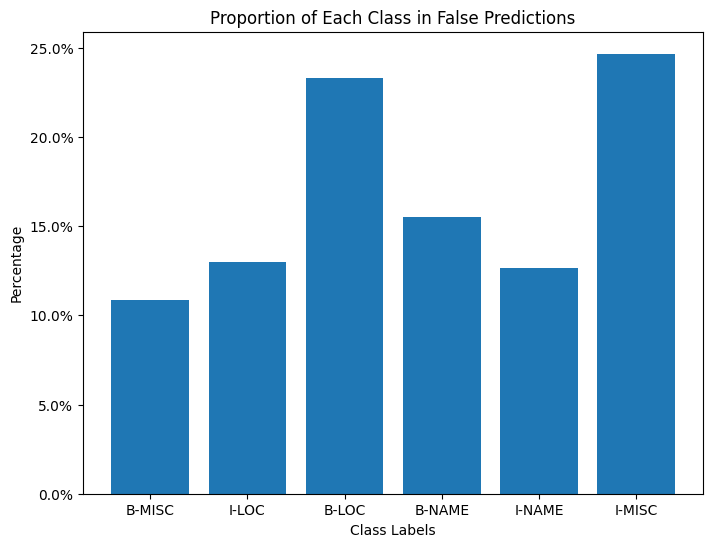

In [110]:
false_pred = [true_labels[i] if predicted_labels[i] != true_labels[i] else -1 for i in range(len(predicted_labels)) ]
while -1 in false_pred :
  false_pred.remove(-1)
import matplotlib.ticker as mticker

# Count the occurrences of each class in false_pred
class_counts = {}
for label in false_pred:
    if label in class_counts:
        class_counts[label] += 1
    else:
        class_counts[label] = 1

# Calculate the total count
total_count = sum(class_counts.values())

# Calculate the percentage for each class
class_labels = [id2label[str(label)] for label in class_counts.keys()]
class_percentages = [(count / total_count) * 100 for count in class_counts.values()]

# Create a bar plot of class proportions
plt.figure(figsize=(8, 6))
plt.bar(class_labels, class_percentages)
plt.xlabel('Class Labels')
plt.ylabel('Percentage')
plt.title('Proportion of Each Class in False Predictions')

# Add percentage sign to y-axis labels
plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter())

plt.show()


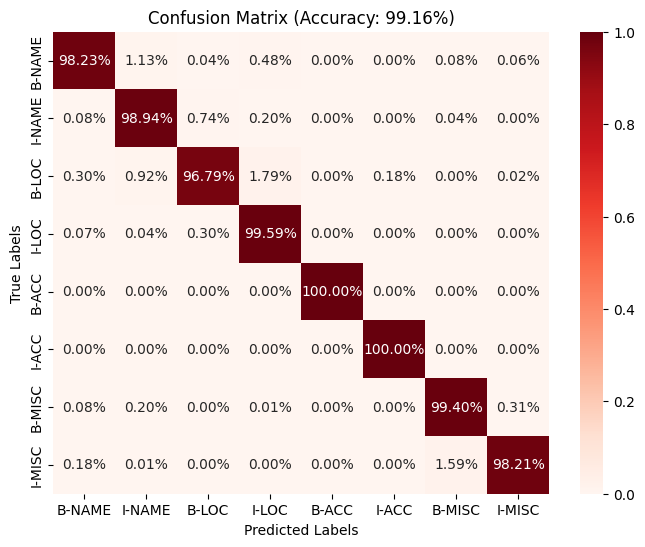

Accuracy: 99.16%
F1 Score: 99.16%
Precision: 99.16%
Recall: 99.16%


In [113]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import seaborn as sns

cm = confusion_matrix(true_labels, predicted_labels)
accuracy = accuracy_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels, average='weighted')
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt=".2%", cmap="Reds")

# Get class labels from indexes using the idx_to_class dictionary
class_labels = [id2label[str(label_idx)] for label_idx in sorted(set(true_labels))]

plt.title("Confusion Matrix (Accuracy: {:.2%})".format(accuracy))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

# Set x-axis and y-axis labels using class labels
plt.xticks(np.arange(len(class_labels)) + 0.5, class_labels)
plt.yticks(np.arange(len(class_labels))+ 0.5, class_labels)

plt.show()

print("Accuracy: {:.2%}".format(accuracy))
print("F1 Score: {:.2%}".format(f1))
print("Precision: {:.2%}".format(precision))
print("Recall: {:.2%}".format(recall))


## Statistical Model

### Hidden Marcov Chain (HMM)

HMM notebook: https://github.com/omerwase/Named-Entity-Recognition/blob/master/hmm.ipynb

https://github.com/stephaniewang526/HMM

https://github.com/usami/hmmner

https://github.com/luopeixiang/named_entity_recognition/blob/master/models/hmm.py (Chinese)

https://github.com/DA-southampton/ner (Chinese again)